In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
sns.set()

In [206]:
pd.set_option('display.max_row', None)
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('athlete_events.csv')

In [4]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [5]:
df.describe(include='all')

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
count,271116.000000,271116,271116,261642.000000,210945.000000,208241.000000,271116,271116,271116,271116.000000,271116,271116,271116,271116,39783
unique,NaN,134732,2,NaN,NaN,NaN,1184,230,51,NaN,2,42,66,765,3
top,NaN,Robert Tait McKenzie,M,NaN,NaN,NaN,United States,USA,2000 Summer,NaN,Summer,London,Athletics,Football Men's Football,Gold
freq,NaN,58,196594,NaN,NaN,NaN,17847,18853,13821,NaN,222552,22426,38624,5733,13372
mean,68248.954396,NaN,NaN,25.556898,175.338970,70.702393,NaN,NaN,NaN,1978.378480,NaN,NaN,NaN,NaN,NaN
std,39022.286345,NaN,NaN,6.393561,10.518462,14.348020,NaN,NaN,NaN,29.877632,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,10.000000,127.000000,25.000000,NaN,NaN,NaN,1896.000000,NaN,NaN,NaN,NaN,NaN
25%,34643.000000,NaN,NaN,21.000000,168.000000,60.000000,NaN,NaN,NaN,1960.000000,NaN,NaN,NaN,NaN,NaN
50%,68205.000000,NaN,NaN,24.000000,175.000000,70.000000,NaN,NaN,NaN,1988.000000,NaN,NaN,NaN,NaN,NaN
75%,102097.250000,NaN,NaN,28.000000,183.000000,79.000000,NaN,NaN,NaN,2002.000000,NaN,NaN,NaN,NaN,NaN


In [6]:
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [7]:
df1_no_na = df[df['Medal'].notna()]

In [8]:
df1_no_na.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
37,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
38,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
40,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
41,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze


In [9]:
df1_no_na.isnull().sum()

ID           0
Name         0
Sex          0
Age        732
Height    8711
Weight    9327
Team         0
NOC          0
Games        0
Year         0
Season       0
City         0
Sport        0
Event        0
Medal        0
dtype: int64

In [10]:
df1_no_na.describe(include='all')

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
count,39783.000000,39783,39783,39051.000000,31072.000000,30456.000000,39783,39783,39783,39783.000000,39783,39783,39783,39783,39783
unique,NaN,28202,2,NaN,NaN,NaN,498,149,51,NaN,2,42,66,756,3
top,NaN,"Michael Fred Phelps, II",M,NaN,NaN,NaN,United States,USA,2008 Summer,NaN,Summer,London,Athletics,Football Men's Football,Gold
freq,NaN,28,28530,NaN,NaN,NaN,5219,5637,2048,NaN,34088,3624,3969,1269,13372
mean,69407.051806,NaN,NaN,25.925175,177.554197,73.770680,NaN,NaN,NaN,1973.943845,NaN,NaN,NaN,NaN,NaN
std,38849.980737,NaN,NaN,5.914026,10.893723,15.016025,NaN,NaN,NaN,33.822857,NaN,NaN,NaN,NaN,NaN
min,4.000000,NaN,NaN,10.000000,136.000000,28.000000,NaN,NaN,NaN,1896.000000,NaN,NaN,NaN,NaN,NaN
25%,36494.000000,NaN,NaN,22.000000,170.000000,63.000000,NaN,NaN,NaN,1952.000000,NaN,NaN,NaN,NaN,NaN
50%,68990.000000,NaN,NaN,25.000000,178.000000,73.000000,NaN,NaN,NaN,1984.000000,NaN,NaN,NaN,NaN,NaN
75%,103461.500000,NaN,NaN,29.000000,185.000000,83.000000,NaN,NaN,NaN,2002.000000,NaN,NaN,NaN,NaN,NaN


In [11]:
df_noc_counts = df1_no_na['NOC'].value_counts()

TOTAL MEDAL COUNT 39,783

In [12]:
NOC = df1_no_na['NOC']
Country_Medal = df1_no_na['Medal']

In [13]:
df_noc_medal = pd.DataFrame()
df_noc_medal['Noc'] = NOC
df_noc_medal['Medal'] = Country_Medal

In [14]:
#WORK ON THIS
df_noc_medal2 = df_noc_medal.groupby(['Noc', 'Medal']).size()
df_noc_medal2 = df_noc_medal2.reset_index()
df_noc_medal2 = df_noc_medal2.rename(columns={0:"Count"})
df_noc_medal2

,Noc,Medal,Count
0,AFG,Bronze,2
1,AHO,Silver,1
2,ALG,Bronze,8
3,ALG,Gold,5
4,ALG,Silver,4
5,ANZ,Bronze,5
6,ANZ,Gold,20
7,ANZ,Silver,4
8,ARG,Bronze,91
9,ARG,Gold,91


In [15]:
USA_Medals = df_noc_medal2.query("Noc == 'USA'")

In [16]:
URS_Medals = df_noc_medal2.query("Noc == 'URS'")

In [17]:
GER_Medals = df_noc_medal2.query("Noc == 'GER'")

In [18]:
GBR_Medals = df_noc_medal2.query("Noc == 'GBR'")

In [19]:
FRA_Medals = df_noc_medal2.query("Noc == 'FRA'")

In [20]:
ITA_Medals = df_noc_medal2.query("Noc == 'ITA'")

In [21]:
SWE_Medals = df_noc_medal2.query("Noc == 'SWE'")

In [22]:
CAN_Medals = df_noc_medal2.query("Noc == 'CAN'")

In [23]:
AUS_Medals = df_noc_medal2.query("Noc == 'AUS'")

In [24]:
HUN_Medals = df_noc_medal2.query("Noc == 'HUN'")

In [25]:
d = [USA_Medals, URS_Medals, GER_Medals, GBR_Medals, FRA_Medals,
    ITA_Medals, SWE_Medals, CAN_Medals, AUS_Medals, HUN_Medals]

WORK ON THIS BELOW

In [26]:
top_10_medals_breakdown = pd.DataFrame()
top_10_medals_breakdown = top_10_medals_breakdown.append(d)

In [27]:
medals_breakdown = top_10_medals_breakdown.groupby(['Medal', 'Count', 'Noc']).size()
medals_breakdown2 = medals_breakdown.reset_index()
medals_breakdown2

bronze = medals_breakdown2.iloc[0:10]
gold = medals_breakdown2.iloc[10:20]
silver = medals_breakdown2.iloc[20:]


In [28]:
bronze = bronze.drop(['Medal', 0], axis=1)
gold = gold.drop(['Medal', 0], axis=1)
silver = silver.drop(['Medal',0], axis=1)


In [29]:
gold

,Count,Noc
10,348,AUS
11,432,HUN
12,463,CAN
13,479,SWE
14,501,FRA
15,575,ITA
16,678,GBR
17,745,GER
18,1082,URS
19,2638,USA


In [30]:
gold2 = gold['Count']
silver2 = silver['Count']
bronze2 = bronze['Count']

Text(0.5, 0, 'Countries')

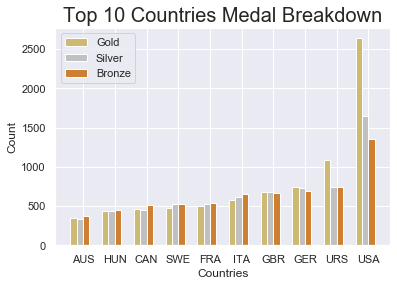

In [31]:
bar_width = 0.20
x = np.arange(len(gold2))

fig, ax = plt.subplots()
x_labels = gold['Noc']
ax.bar(x, gold2, width=bar_width, label='Gold', color='y')
ax.bar(x+bar_width, silver2, width=bar_width, label='Silver', color='#C0C0C0')
ax.bar(x+bar_width*2, bronze2, width=bar_width, label='Bronze', color='#cd7f32')
plt.legend()

plt.xticks(x + bar_width*1.5, x_labels)
plt.title('Top 10 Countries Medal Breakdown', Fontsize=20)
plt.ylabel('Count', Fontsize=12)
plt.xlabel('Countries', Fontsize=12)




In [32]:
#Converting int64 to pandas DataFrame
countries = df_noc_counts.reset_index()
countries = countries.rename(columns={'index': 'Countries', 'NOC': 'Count'})
countries.index = np.arange(1,len(countries)+1)

In [33]:
top10 = countries.head(11)
top10

,Countries,Count
1,USA,5637
2,URS,2503
3,GER,2165
4,GBR,2068
5,FRA,1777
6,ITA,1637
7,SWE,1536
8,CAN,1352
9,AUS,1320
10,RUS,1165


In [34]:
#Russia and URS
top10.at[2,'Count'] = 2503+1162
top10_1 = top10.drop([10], axis=0)

In [35]:
top10_2 = top10_1.reset_index()
top10_3 = top10_2.drop(['index'], axis=1)
top10_3.index = np.arange(1,len(top10_3)+1)
top10_3

,Countries,Count
1,USA,5637
2,URS,3665
3,GER,2165
4,GBR,2068
5,FRA,1777
6,ITA,1637
7,SWE,1536
8,CAN,1352
9,AUS,1320
10,HUN,1135


In [36]:
medalcount = top10_3['Count']
medal_percentage = (medalcount / 39051 * 100).round(2)

In [37]:
top10_3['Medal Percentage vs Total Medal Percentage of The World'] = medal_percentage
top10_3

,Countries,Count,Medal Percentage vs Total Medal Percentage of The World
1,USA,5637,14.43
2,URS,3665,9.39
3,GER,2165,5.54
4,GBR,2068,5.30
5,FRA,1777,4.55
6,ITA,1637,4.19
7,SWE,1536,3.93
8,CAN,1352,3.46
9,AUS,1320,3.38
10,HUN,1135,2.91


Text(0.5, 1, 'Total Medal')

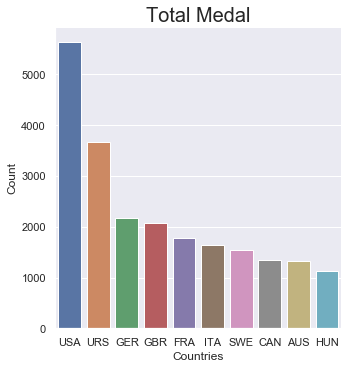

In [38]:
sns.catplot(x="Countries", y="Count", kind="bar", data=top10_3)
plt.title('Total Medal', Fontsize=20)

Athlete Medal Breakdown

In [39]:
df_name_counts = df1_no_na['Name'].value_counts()

In [40]:
df_name_counts.head(10)

Michael Fred Phelps, II               28
Larysa Semenivna Latynina (Diriy-)    18
Nikolay Yefimovich Andrianov          15
Takashi Ono                           13
Borys Anfiyanovych Shakhlin           13
Ole Einar Bjrndalen                   13
Edoardo Mangiarotti                   13
Paavo Johannes Nurmi                  12
Sawao Kato                            12
Natalie Anne Coughlin (-Hall)         12
Name: Name, dtype: int64

In [41]:
athletes = df_name_counts.reset_index()

In [42]:
top10_athletes = athletes.head(10)
top10_athletes = top10_athletes.rename(columns={'index': 'Name', 'Name': 'Medal Count'})
top10_athletes.index = np.arange(1,len(top10_athletes)+1)
top10_athletes

,Name,Medal Count
1,"Michael Fred Phelps, II",28
2,Larysa Semenivna Latynina (Diriy-),18
3,Nikolay Yefimovich Andrianov,15
4,Takashi Ono,13
5,Borys Anfiyanovych Shakhlin,13
6,Ole Einar Bjrndalen,13
7,Edoardo Mangiarotti,13
8,Paavo Johannes Nurmi,12
9,Sawao Kato,12
10,Natalie Anne Coughlin (-Hall),12


Athlete query

In [43]:
phelps = df1_no_na.query("Name == 'Michael Fred Phelps, II'")

In [44]:
latynina = df1_no_na.query("Name == 'Larysa Semenivna Latynina (Diriy-)'")

In [45]:
andrianov = df1_no_na.query("Name == 'Nikolay Yefimovich Andrianov'")

In [46]:
shakhlin = df1_no_na.query("Name == 'Borys Anfiyanovych Shakhlin'")

In [47]:
ono = df1_no_na.query("Name == 'Takashi Ono'")

In [48]:
bjrndalen = df1_no_na.query("Name == 'Ole Einar Bjrndalen'")

In [49]:
lochte = df1_no_na.query("Name == 'Ryan Steven Lochte'")

In [50]:
schmidt = df1_no_na.query("Name == 'Birgit Fischer-Schmidt'")

In [51]:
kato = df1_no_na.query("Name == 'Sawao Kato'")

In [52]:
hall = df1_no_na.query("Name == 'Natalie Anne Coughlin (-Hall)'")

In [53]:
athlete_10 = [phelps, latynina, andrianov, shakhlin, ono, bjrndalen, lochte, schmidt, kato, hall]

In [54]:
results = []
results2 = []
results3 = []
results4 = []
for n in athlete_10:
    x = n.max()['Sex']
    y = n.max()['Year']
    z = n.max()['Team']
    w = n.max()['Sport']
    results.append(x)
    results2.append(y)
    results3.append(z)
    results4.append(w)

In [55]:
top10_athletes['Gender'] = results

In [56]:
top10_athletes['Last Medal won'] = results2

In [57]:
top10_athletes['Team'] = results3

In [58]:
top10_athletes['Sport'] = results4

In [59]:
top10_athletes

,Name,Medal Count,Gender,Last Medal won,Team,Sport
1,"Michael Fred Phelps, II",28,M,2016,United States,Swimming
2,Larysa Semenivna Latynina (Diriy-),18,F,1964,Soviet Union,Gymnastics
3,Nikolay Yefimovich Andrianov,15,M,1980,Soviet Union,Gymnastics
4,Takashi Ono,13,M,1964,Soviet Union,Gymnastics
5,Borys Anfiyanovych Shakhlin,13,M,1964,Japan,Gymnastics
6,Ole Einar Bjrndalen,13,M,2014,Norway,Biathlon
7,Edoardo Mangiarotti,13,M,2016,United States,Swimming
8,Paavo Johannes Nurmi,12,F,2004,Germany,Canoeing
9,Sawao Kato,12,M,1976,Japan,Gymnastics
10,Natalie Anne Coughlin (-Hall),12,F,2012,United States,Swimming


Text(0.5, 0, 'Medal Count')

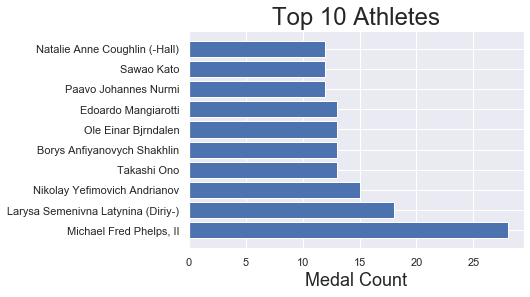

In [60]:
plt.barh(top10_athletes['Name'], top10_athletes['Medal Count'])
plt.title('Top 10 Athletes', Fontsize=24)
plt.xlabel('Medal Count', Fontsize=18)

In [61]:
Sex = df['Sex']
Year = df['Year']
Year_sex = pd.DataFrame()
Year_sex['Sex'] = Sex
Year_sex['Year'] = Year
Year_sex

,Sex,Year
0,M,1992
1,M,2012
2,M,1920
3,M,1900
4,F,1988
...,...,...
271111,M,1976
271112,M,2014
271113,M,2014
271114,M,1998


In [62]:
Year_sex2 = Year_sex['Sex'].map({'M': 1, 'F': 0})

In [63]:
Year_sex['Sex'] = Year_sex2

In [64]:
gender_per_year = Year_sex.groupby(['Sex', 'Year']).size()
gender_per_year2 = gender_per_year.reset_index()
gender_per_year3 = gender_per_year2.rename(columns={0:'Count'})

In [65]:
women = gender_per_year3.iloc[0:34]
men = gender_per_year3.iloc[35:]

Text(0.5, 1.0, 'Gender Comparison through the Years')

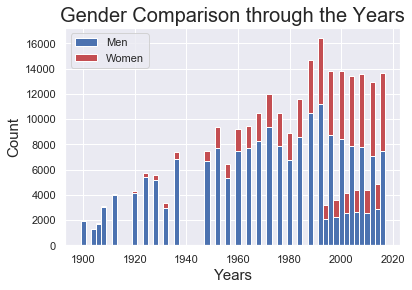

In [66]:
width = 2
fig, ax = plt.subplots()
ax.bar(men['Year'], men['Count'], width, label='Men', color='b')
ax.bar(women['Year'], women['Count'], width, bottom=men['Count'],
       label='Women', color='r')
plt.legend()
plt.xlabel('Years', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Gender Comparison through the Years', fontsize=20)


In [67]:
phelps['Medal'].value_counts()

Gold      23
Silver     3
Bronze     2
Name: Medal, dtype: int64

In [68]:
result_medal = []
for n in athlete_10:
    x = n['Medal'].value_counts()
    result_medal.append(x)
    

In [69]:
medal_array = pd.DataFrame()

In [70]:
medal_array = medal_array.append(result_medal)

In [71]:
athlete_gold = medal_array["Gold"]
athlete_silver = medal_array['Silver']
athlete_bronze = medal_array['Bronze']

Text(0.5, 0, 'Athletes')

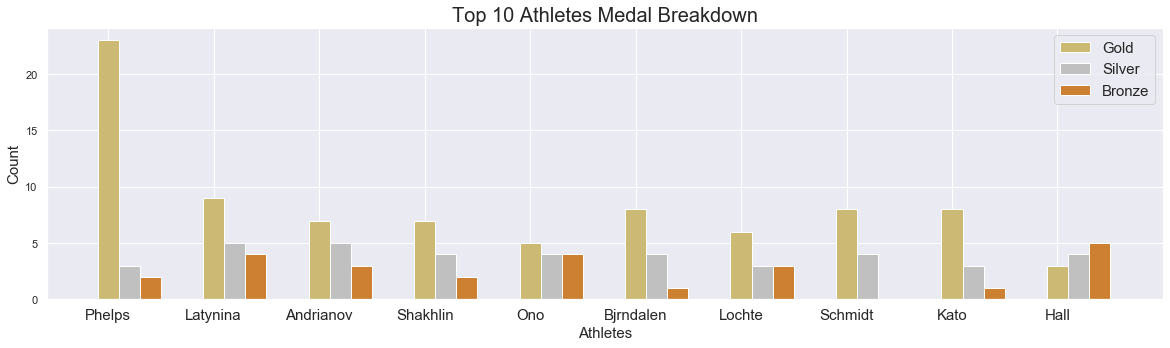

In [205]:
bar_width = 0.20
x = np.arange(len(athlete_gold))

fig, ax = plt.subplots(figsize=(20,5))
x_labels = ['Phelps', 'Latynina', 'Andrianov', 'Shakhlin', 'Ono', 'Bjrndalen', 'Lochte', 'Schmidt', 'Kato', 'Hall']
ax.bar(x, athlete_gold, width=bar_width, label='Gold', color='y')
ax.bar(x+bar_width, athlete_silver, width=bar_width, label='Silver', color='#C0C0C0')
ax.bar(x+bar_width*2, athlete_bronze, width=bar_width, label='Bronze', color='#cd7f32')
plt.legend(fontsize=15)

ax.set_xticks([0,1,2,3,4,5,6,7,8,9,10])
ax.set_xticklabels(['Phelps', 'Latynina', 'Andrianov', 'Shakhlin', 'Ono', 'Bjrndalen', 'Lochte', 'Schmidt', 'Kato', 'Hall'],
                  fontsize=15)
plt.title('Top 10 Athletes Medal Breakdown', Fontsize=20)
plt.ylabel('Count', Fontsize=15)
plt.xlabel('Athletes', Fontsize=15)


